In [1]:
import matplotlib.pyplot as plt
import pystac_client

from mccn.loader import stac_load_raster
from mccn.extent import GeoBoxBuilder

ENDPOINT = "http://203.101.227.130:8082/"
client = pystac_client.Client.open(ENDPOINT)
collection = client.get_collection("OZBarleyTestData")

In [2]:
gbox = GeoBoxBuilder.from_collection(collection, 100)
items = list(collection.get_all_items())

In [3]:
raster_items = [
    collection.get_item("OZBarley1_240806"),
    collection.get_item("OZBarley1_240906"),
    collection.get_item("OZBarley1_241010"),
    collection.get_item("OZBarley2_240806"),
    collection.get_item("OZBarley2_240906"),
    collection.get_item("OZBarley2_241010"),
    collection.get_item("OZBarley1_241010_DSM"),
    collection.get_item("OZBarley2_241010_DSM"),
]

In [4]:
ds = stac_load_raster(raster_items, gbox)

In [5]:
ds

<xarray.Dataset> Size: 302kB
Dimensions:      (y: 100, x: 100, time: 3)
Coordinates:
  * y            (y) float64 800B -35.05 -35.05 -35.05 ... -35.05 -35.05 -35.05
  * x            (x) float64 800B 147.3 147.3 147.3 147.3 ... 147.3 147.3 147.3
  * time         (time) datetime64[ns] 24B 2024-08-05T23:55:00 ... 2024-10-09...
    spatial_ref  int32 4B 4326
Data variables:
    b01          (time, y, x) uint16 60kB 0 0 0 0 0 0 ... 65535 65535 65535 0 0
    b02          (time, y, x) uint16 60kB 0 0 0 0 0 0 ... 65535 65535 65535 0 0
    b03          (time, y, x) uint16 60kB 0 0 0 0 0 0 ... 65535 65535 65535 0 0
    dsm          (time, y, x) float32 120kB nan nan nan nan ... 0.0 0.0 0.0 0.0

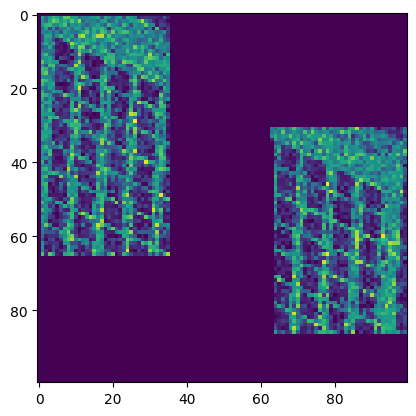

In [6]:
plt.imshow(ds.b01.values[0, :, :])
plt.show()

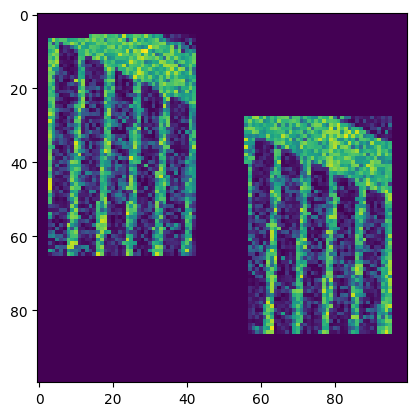

In [7]:
plt.imshow(ds.b01.values[1, :, :])
plt.show()

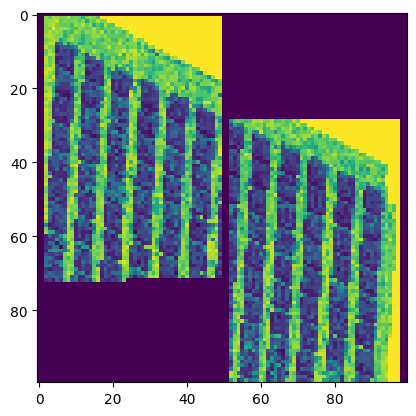

In [8]:
plt.imshow(ds.b01.values[2, :, :])
plt.show()

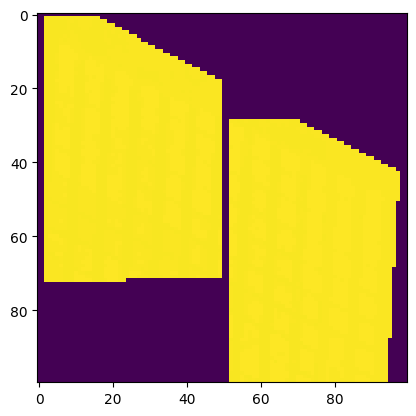

In [9]:
plt.imshow(ds.dsm.values[2, :, :])
plt.show()

### Selecting Area 1 by geobox 

In [10]:
geobox1 = (
    GeoBoxBuilder(crs=4326)
    .set_bbox(collection.get_item("OZBarley1_layout").bbox)
    .set_shape(100, 100)
    .build()
)

In [11]:
ds1 = stac_load_raster(raster_items, geobox1)

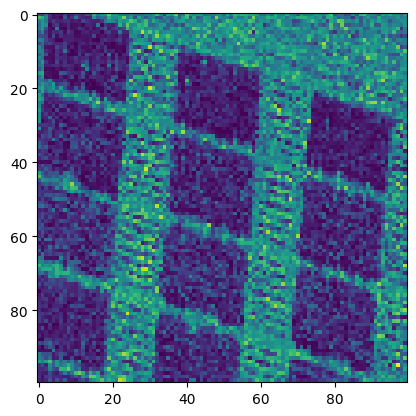

In [12]:
plt.imshow(ds1.b01.values[0, :, :])
plt.show()

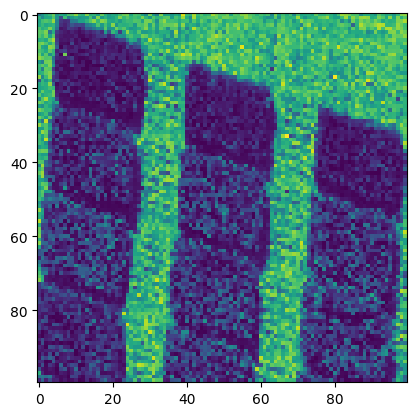

In [13]:
plt.imshow(ds1.b01.values[1, :, :])
plt.show()

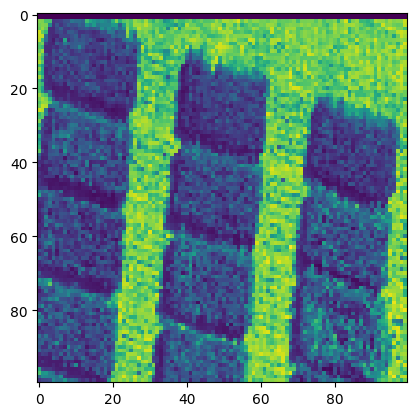

In [14]:
plt.imshow(ds1.b01.values[2, :, :])
plt.show()

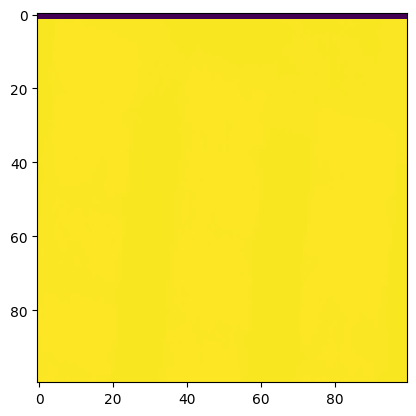

In [15]:
plt.imshow(ds1.dsm.values[2, :, :])
plt.show()

### Selecting Area 2 by geobox 

In [16]:
geobox2 = (
    GeoBoxBuilder(crs=4326)
    .set_bbox(collection.get_item("OZBarley2_layout").bbox)
    .set_shape(100, 100)
    .build()
)

In [17]:
ds2 = stac_load_raster(raster_items, geobox2)

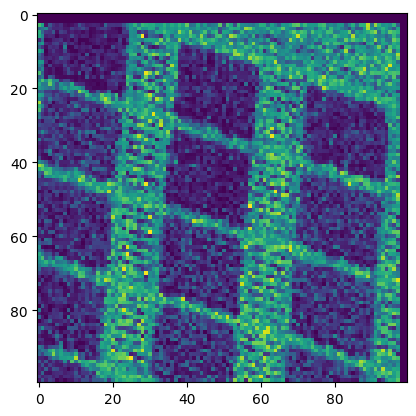

In [18]:
plt.imshow(ds2.b01.values[0, :, :])
plt.show()

In [19]:
collection.get_item("OZBarley1_layout").bbox

[147.32116813568393,
 -35.04973379104157,
 147.32135240161148,
 -35.04966019090715]